In [ ]:
# Cobb Douglas 

Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 759 ('font.family: sans-serif')
Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 760 ('font.sans-serif: Arial Unicode MS, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 761 ('axes.unicode_minus: False')


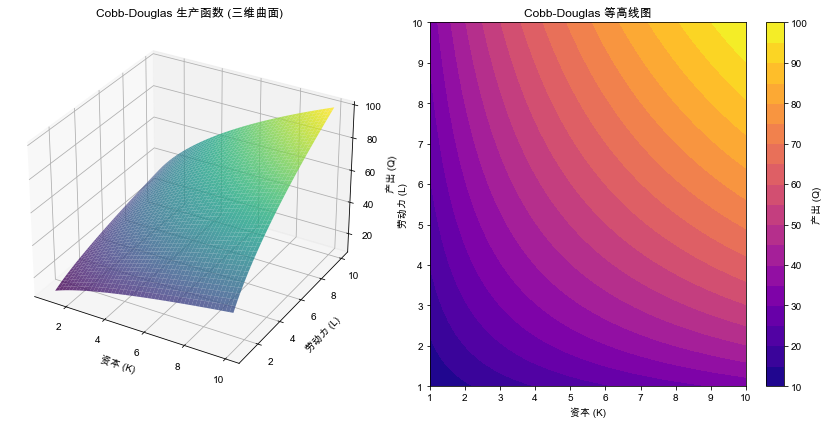

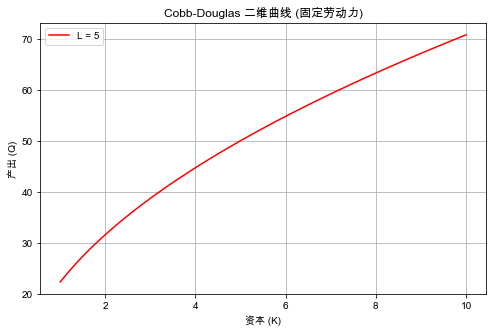

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 参数设置 ---
A = 10  # 全要素生产率
alpha = 0.5 # 资本产出弹性
beta = 0.5  # 劳动力产出弹性
# 规模报酬: alpha + beta = 1 (规模报酬不变)

# --- 数据生成 ---
# 创建 K (资本) 和 L (劳动力) 的取值范围
K = np.linspace(1, 10, 50)
L = np.linspace(1, 10, 50)
# 创建 K-L 网格
K_mesh, L_mesh = np.meshgrid(K, L)

# --- 计算产出 Q ---
# Cobb-Douglas 函数: Q = A * K^alpha * L^beta
Q_mesh = A * (K_mesh**alpha) * (L_mesh**beta)

# --- 可视化 ---
fig = plt.figure(figsize=(12, 6))

# 1. 三维曲面图
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(K_mesh, L_mesh, Q_mesh, cmap='viridis', alpha=0.8)
ax1.set_title('Cobb-Douglas 生产函数 (三维曲面)')
ax1.set_xlabel('资本 (K)')
ax1.set_ylabel('劳动力 (L)')
ax1.set_zlabel('产出 (Q)')

# 2. 等高线图 (投射到 K-L 平面)
ax2 = fig.add_subplot(122)
# contourf 填充等高线, contour 画线条
contour = ax2.contourf(K_mesh, L_mesh, Q_mesh, levels=20, cmap='plasma')
fig.colorbar(contour, ax=ax2, label='产出 (Q)')
ax2.set_title('Cobb-Douglas 等高线图')
ax2.set_xlabel('资本 (K)')
ax2.set_ylabel('劳动力 (L)')

plt.tight_layout()
plt.show()

# --- 二维曲线示例 (固定劳动力 L=5) ---
L_fixed = 5
Q_fixed_L = A * (K**alpha) * (L_fixed**beta)
plt.figure(figsize=(8, 5))
plt.plot(K, Q_fixed_L, label=f'L = {L_fixed}', color='red')
plt.title('Cobb-Douglas 二维曲线 (固定劳动力)')
plt.xlabel('资本 (K)')
plt.ylabel('产出 (Q)')
plt.legend()
plt.grid(True)
plt.show()

<font size="4" color="red">根據結果，發現同質性檢結果不顯著(p>.05)，因此可以接續進行Anova檢定：</font>

In [2]:
f_statistic, p_value = f_oneway(df["A班"], df["B班"], df["C班"])
print("f_statistic:%.2f"%f_statistic)
print("p_value:%.2f"%p_value)

f_statistic:3.92
p_value:0.02


<font size="4" color="red">ANOVA（變異數分析）檢定多個樣本變異數的同質性，主要看的是「組間變異」與「組內變異」的比例，目的是判斷多組樣本的平均數是否有顯著差異，而不是直接檢定變異數本身，常用的檢定變異數同質性（Homogeneity of Variances）的方法有 Levene's Test（推薦）和 Bartlett's Test，若變異數不具同質性，則需考慮使用Welh's ANOVA。</font>

<font size="4" color="blue">這裡一樣我們關注p值，所以根據結果，發現呈顯著差異(p>.05)，代表三個班級的成績，擁有明顯的差異。不過到這裡一定會好奇，既然有顯著差異，那到底是哪一班的成績比較突出一點？或是是比較差？這時就可以進行事後檢定(Post-hoc)，來幫我們探知一切：</font>

In [3]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#轉換資料格式
new_df = pd.melt(df, var_name="組別", value_name="成績")
posthoc = pairwise_tukeyhsd(new_df["成績"], new_df["組別"])
print(posthoc.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A班     B班     -7.5  0.049 -14.9734 -0.0266   True
    A班     C班     -7.7 0.0419 -15.1734 -0.2266   True
    B班     C班     -0.2    0.9  -7.6734  7.2734  False
-----------------------------------------------------


<font size="5" color="orange">變異數異質</font>

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import levene
df = pd.DataFrame({
    "A班":[90,85,70,88,77,93,84,88,85,96,95,93,100,94,86,70,87,73,72,69,82,93,81,89,83,80,80,79,62,81],
    "B班":[59,44,73,74,67,93,74,80,95,96,55,73,77,84,96,30,80,23,90,81,72,73,91,99,88,60,79,90,82,71],
    "C班":[90,74,93,60,97,93,94,80,85,86,95,54,27,74,26,70,70,77,10,31,83,43,65,77,78,72,71,82,93,70]
})

statistic, p_value=levene(df["A班"], df["B班"], df["C班"])
print('statistic:%.2f'%statistic)
print('p_value:%.2f'%p_value)

statistic:3.93
p_value:0.02


<font size="4" color="red"> 根據同質性檢定發現，樣本之間變異數有顯著差異(p<.05)，因此使用Welch’s Anova進行後續的分析與探討： </font>

In [5]:
import pingouin as pg
new_df = pd.melt(df, var_name='班級', value_name='分數')
pg.welch_anova(dv='分數', between='班級', data=new_df)

SyntaxError: future feature annotations is not defined (register.py, line 3)

Source: https://medium.com/@jason8410271027/%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-anova-%E7%90%86%E8%AB%96-python%E5%AF%A6%E4%BD%9C-a86dbbfee60

<font color="red" size="4"> P554 範例11.1</font>

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import levene
df = pd.DataFrame({
    "A":[36,26,31,20,34,25],
    "B":[40,29,38,32,39,34],
    "C":[32,18,23,21,33,27]
})

statistic, p_value=levene(df["A"], df["B"], df["C"])
print('statistic:%.2f'%statistic)
print('p_value:%.2f'%p_value)

statistic:0.61
p_value:0.55


Source: YT, Performing Python Welch's T Test (Independent Two Sample) in Python, Ryan & Matt Data Science